# Topic Modeling: Comparing Austen and Brontë

In [1]:
import nltk, os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

filenames = ['data/austen-brontë/Austen_Emma.txt',
             'data/austen-brontë/Austen_Pride.txt',
             'data/austen-brontë/Austen_Sense.txt',
             'data/austen-brontë/CBronte_Jane.txt',
             'data/austen-brontë/CBronte_Professor.txt',
             'data/austen-brontë/CBronte_Villette.txt']

corpus_path = os.path.join('data', 'austen-brontë')

In [10]:
filenames = ['data/austen-brontë/Austen_Emma.txt',
             'data/austen-brontë/Austen_Pride.txt',
             'data/austen-brontë/Austen_Sense.txt',
             'data/austen-brontë/CBronte_Jane.txt',
             'data/austen-brontë/CBronte_Professor.txt',
             'data/austen-brontë/CBronte_Villette.txt']

#Create document-term matrix. CountVectorizer converts collections of texts to a sparse matrix of token counts
vectorizer = CountVectorizer(input='filename')

dtm = vectorizer.fit_transform(filenames) #sparse matrix of token counts
vocab = vectorizer.get_feature_names() #vocabulary list (22,854 words)

dtm = dtm.toarray() #6x22854. 6 texts x 22854 words
vocab = np.array(vocab) #convert vocab list to np array

dtm[2, vocab=='house'] #The word house appears 95 times in Jane Austen's Emma (0th element in doc list)

array([161], dtype=int64)

In [15]:
dtm.shape # 6 rows (texts), 22,854 words/tokens

(6, 22854)

In [18]:
dtm[:10,:10] # 1st word in vocab appears 2x in Austen's Emma

array([[2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1],
       [0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [23]:
dtm[0, vocab==vocab[2]]

array([0], dtype=int64)

### Determining similarity

#### Euclidean Distance

Use Euclidean distance and cosine similarity to measure the similarity of these texts to one another.

Since each row of the DMTM is a sequence of a novel's word frequencies, we can determine similarity (or distance) between sequences of numbers by measuring Euclidean distance.

Euclidean distance measures the distance between two points the way one would usually think about distance. In 3-D space, if you have a point at (1, 2, 4) and another point at (6, 7, 9), the Euclidean distance between them is: $$\sqrt{(1-6)^2 + (2 - 7)^2 + (4 - 9)^2}$$ $$\sqrt{25 + 25 + 25}$$ $$\sqrt{75}$$ $$5\sqrt{3}$$

This can be extended from 3-D space to n-dimensional space (e.g. 22,854-dimensional space).

```sklearn.metrics.pairwise.euclidean_distances``` calculates Euclidean distance for us.

In [24]:
#Determine how different texts are (smaller numbers = more similar)
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

eucdist = euclidean_distances(dtm)
print(np.round(eucdist,1))

[[    0.   3856.3  4182.8  5119.7  7113.3  5280.2]
 [ 3856.3     0.   1922.6  6313.1  4126.2  6381.2]
 [ 4182.8  1922.6     0.   6657.4  4045.3  6650.3]
 [ 5119.7  6313.1  6657.4     0.   8363.8  2591.5]
 [ 7113.3  4126.2  4045.3  8363.8     0.   8484.1]
 [ 5280.2  6381.2  6650.3  2591.5  8484.1     0. ]]


Diagonals are all 0 because each book is 0 units away from itself.

Index 0 (Austen's Emma) is 3856.3 units away from Index 1 (Austen's Pride and Prejudice).

The "most similar" novels are Index 1 (Austen's Pride and Prejudice) and Index 2 (Austen's Sense and Sensibility).

#### Cosine Similarity

Cosine similarity takes the length of the novels into account. Cosine similarity is actually a measure of similarity rather than distance (Euclidean *distance*), so is has a range of (0,1).

It represents the cosine of the angle between 2 vectors (side adjacent to angle / hypotenuse).

Small angle (both vectors point in similar directions) = high similarity
large angle (vectors are close to perpendicular) = low similarity.

To get a measure of how *dissimilar* two novels are, we simply calculate 1-cossim

In [29]:
cosdist = 1-cosine_similarity(dtm) #measure distance that takes into consideration length of novels
#cossim is measure of similarity btn 0 & 1 (cos of angle btn vectors). To get distance, do 1 - cossim
print(np.round(cosdist,2))

[[-0.    0.02  0.03  0.05  0.06  0.05]
 [ 0.02  0.    0.02  0.05  0.04  0.04]
 [ 0.03  0.02  0.    0.06  0.05  0.05]
 [ 0.05  0.05  0.06 -0.    0.02  0.01]
 [ 0.06  0.04  0.05  0.02  0.    0.01]
 [ 0.05  0.04  0.05  0.01  0.01  0.  ]]


Here, the *most similar* texts are Index 4 Brontë's "The Professor" and Index 5 Brontë's "Villette

as well as Index 3 (Brontë's Jane Eyre) with Index 5 (Brontë's Villette).

#### Jaccard Similarity

Given 2 sets, Jaccard similarity is the Intersection / Union, so for the DTM, it's essentially the percentage of elements in each row that are the same / total elements in the rows.

In [39]:
from sklearn.metrics.pairwise import pairwise_distances
dist = pairwise_distances(dtm, metric='jaccard') #measure distance that takes into consideration length of novels
#cossim is measure of similarity btn 0 & 1 (cos of angle btn vectors). To get distance, do 1 - cossim
print(np.round(dist,2))

[[ 0.    0.91  0.91  0.95  0.94  0.95]
 [ 0.91  0.    0.89  0.95  0.94  0.95]
 [ 0.91  0.89  0.    0.95  0.94  0.95]
 [ 0.95  0.95  0.95  0.    0.91  0.91]
 [ 0.94  0.94  0.94  0.91  0.    0.92]
 [ 0.95  0.95  0.95  0.91  0.92  0.  ]]


### Visualizing Distances

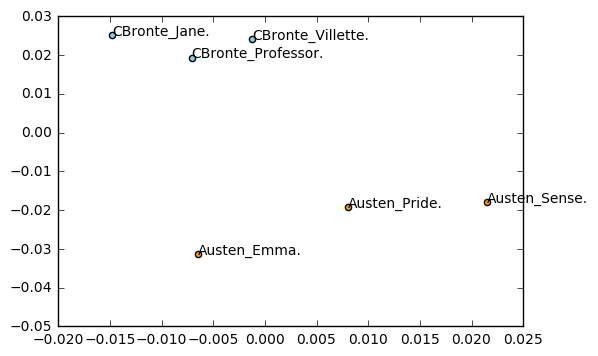

In [30]:
#Visualize distances

import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# 2-D multidimensional scaling
mds = MDS(n_components=2, dissimilarity='precomputed') #dissimiliarity can be precomputed or euclidean
# we use precomputed bc we already have a distance matrix (cosdist)
pos = mds.fit_transform(cosdist) #(x,y) coordinates of each text

%matplotlib inline
xs, ys = pos[:,0], pos[:,1] #list of x-coords; list of y-coords;
names = [os.path.basename(fn).replace('txt','') for fn in filenames]

for x, y, name in zip(xs, ys, names):
    color = 'orange' if 'Austen' in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

plt.show()

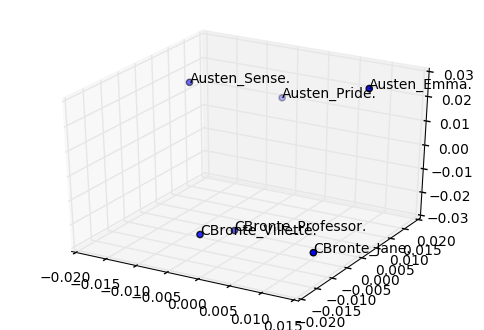

In [32]:
#3-D MDS
%matplotlib inline
mds = MDS(n_components=3, dissimilarity='precomputed')
pos = mds.fit_transform(cosdist) #(x, y, z)-coordinates for each text

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:,0],pos[:,1],pos[:,2])

for x, y, z, s in zip(pos[:,0],pos[:,1],pos[:,2], names):
    ax.text(x, y, z, s)

plt.show()

### Ward's Method for hierarchical text clustering

Each text begins in its own cluster

Find the closest clusters (change in sum of squared distances when they are merged).
Merge them

Return aa tree containing a record of cluster-merges

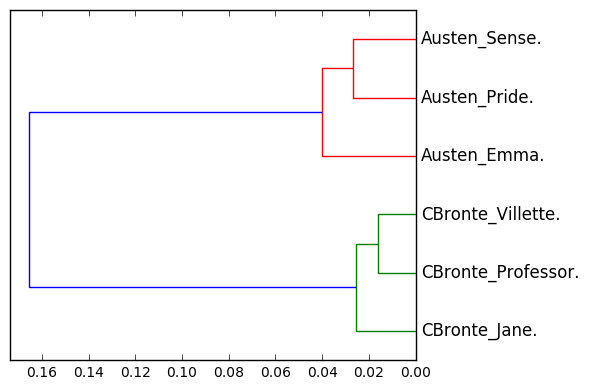

In [33]:
#Ward's method for hierarchical text clustering
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(cosdist)

%matplotlib inline
dendrogram(linkage_matrix, orientation='left', labels=names)
plt.tight_layout()
plt.show()

array(['abdiel', 'abdy', 'abed', 'aberdeen', 'aberration'], 
      dtype='<U20')

14414